In [8]:
import torch
import matplotlib.pyplot as plt

In [9]:
N=torch.zeros((27,27),dtype=torch.int32)

In [10]:
N.shape

torch.Size([27, 27])

In [11]:
words=open('names.txt','r').read().splitlines()

In [363]:
len(words)

32033

In [12]:
chars=sorted(list(set(''.join(words))))

In [13]:
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}

In [42]:
# stoi

In [24]:
# itos

In [32]:
# b={}
# for w in words:
#     name=['<S>']+list(w)+['<E>']
#     for x,y in zip(name,name[1:]):
#         b[(x,y)]=b.get((x,y),0) + 1
for w in words:
    name=['.']+list(w)+['.']
    for x,y in zip(name,name[1:]):
        N[stoi[x],stoi[y]]+= 1

In [36]:
# sorted(b.items(),key=lambda kv:-kv[1])

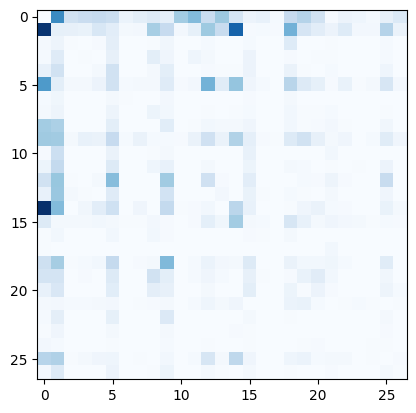

In [41]:
plt.imshow(N,cmap='Blues')

### NN approch

In [14]:
# words

In [15]:
xs,ys=[],[]
for w in words[:1]:
    name=['.']+list(w)+['.']
    for x,y in zip(name,name[1:]):
        xs.append(stoi[x])
        ys.append(stoi[y])
xs=torch.tensor(xs)
ys=torch.tensor(ys)

In [16]:
xs

tensor([ 0,  5, 13, 13,  1])

In [17]:
ys

tensor([ 5, 13, 13,  1,  0])

In [18]:
xenc=torch.nn.functional.one_hot(xs,num_classes=27).float()

In [19]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

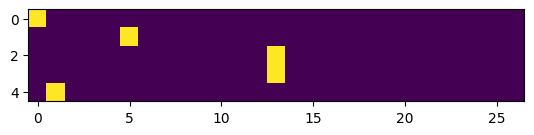

In [20]:
plt.imshow(xenc)

In [21]:
xenc.dtype

torch.float32

In [22]:
xenc.shape

torch.Size([5, 27])

Essentially what we are doing is we are taking input layer of 27 and we are sending one hot vector at a single round. so shape of w for single neuron is 27 * 1 and we are taking 27 neurons in hidden layer

In [23]:
W=torch.randn((27,27))

In [24]:
logits=xenc @ W

In [31]:
logits[:1]

tensor([[ 0.4202,  0.2082,  0.1716,  1.0313, -1.0565,  0.0907,  0.8835,  0.8459,
         -0.1742,  1.1272,  1.1499,  0.9338,  0.0811,  0.1836,  0.7221, -0.6086,
          0.2446, -1.0480,  0.2273, -0.7793, -0.8747,  1.2098, -1.0722,  0.2030,
          0.9666,  0.8442,  0.0192]])

In [32]:
counts=logits.exp()

In [41]:
probs=counts/counts.sum(1,keepdim=True)

In [42]:
ys.shape

torch.Size([5])

In [43]:
probs.shape


torch.Size([5, 27])

In [91]:
probs[torch.arange(5),ys].log().mean()

tensor(-4.2090)

In [97]:
ys

tensor([ 5, 13, 13,  1,  0])

proper NN flow

In [45]:
print(xs,ys)

tensor([ 0,  5, 13, 13,  1]) tensor([ 5, 13, 13,  1,  0])


In [72]:
# initialise weights and set xs and ys
W=torch.randn((27,27),requires_grad=True)
X=torch.nn.functional.one_hot(xs,num_classes=27).float()

In [73]:
X.shape

torch.Size([5, 27])

In [94]:
# forward pass
logits=X @ W
counts=logits.exp()
probs=counts/counts.sum(1,keepdim=True)
loss=-probs[torch.arange(5),ys].log().mean()

In [95]:
loss

tensor(3.2088, grad_fn=<NegBackward0>)

In [96]:
#backward pass
W.grad=None
loss.backward()

In [97]:
#update weights based off backward prop
W.data+=-0.1*W.grad

Clear Imple

In [266]:
xs,ys=[],[]
for w in words:
    name=['.']+list(w)+['.']
    for x,y in zip(name,name[1:]):
        xs.append(stoi[x])
        ys.append(stoi[y])
xs=torch.tensor(xs)
ys=torch.tensor(ys)

In [213]:
# initialise weights and set xs and ys
W=torch.randn((27,27),requires_grad=True)
X=torch.nn.functional.one_hot(xs,num_classes=27).float()
num=xs.nelement()

In [214]:
# # forward pass
# logits=X @ W
# counts=logits.exp()
# probs=counts/counts.sum(1,keepdim=True)
# loss=-probs[torch.arange(num),ys].log().mean()

In [215]:
# #backward pass
# W.grad=None
# loss.backward()

In [216]:
# #update weights based off backward prop
# W.data+=-0.1*W.grad

In [366]:
W.shape

torch.Size([27, 27])

In [365]:
X.shape

torch.Size([228146, 27])

In [367]:
a=X @ W

In [368]:
a.shape

torch.Size([228146, 27])

In [218]:
#gradient descent
for i in range(1000):
    # forward pass
    logits=X @ W
    counts=logits.exp()
    probs=counts/counts.sum(1,keepdim=True)
    loss=-probs[torch.arange(num),ys].log().mean()
    #backward pass
    W.grad=None
    loss.backward()
    #update weights based off backward prop
    W.data+=-10*W.grad
    print(loss)

tensor(2.5649, grad_fn=<NegBackward0>)
tensor(2.5638, grad_fn=<NegBackward0>)
tensor(2.5627, grad_fn=<NegBackward0>)
tensor(2.5617, grad_fn=<NegBackward0>)
tensor(2.5606, grad_fn=<NegBackward0>)
tensor(2.5596, grad_fn=<NegBackward0>)
tensor(2.5586, grad_fn=<NegBackward0>)
tensor(2.5576, grad_fn=<NegBackward0>)
tensor(2.5566, grad_fn=<NegBackward0>)
tensor(2.5557, grad_fn=<NegBackward0>)
tensor(2.5548, grad_fn=<NegBackward0>)
tensor(2.5538, grad_fn=<NegBackward0>)
tensor(2.5529, grad_fn=<NegBackward0>)
tensor(2.5520, grad_fn=<NegBackward0>)
tensor(2.5512, grad_fn=<NegBackward0>)
tensor(2.5503, grad_fn=<NegBackward0>)
tensor(2.5495, grad_fn=<NegBackward0>)
tensor(2.5486, grad_fn=<NegBackward0>)
tensor(2.5478, grad_fn=<NegBackward0>)
tensor(2.5470, grad_fn=<NegBackward0>)
tensor(2.5462, grad_fn=<NegBackward0>)
tensor(2.5454, grad_fn=<NegBackward0>)
tensor(2.5446, grad_fn=<NegBackward0>)
tensor(2.5439, grad_fn=<NegBackward0>)
tensor(2.5431, grad_fn=<NegBackward0>)
tensor(2.5424, grad_fn=<N

In [255]:
probs[5,15]

tensor(0.0123, grad_fn=<SelectBackward0>)

In [247]:
ys[5]

tensor(15)

In [370]:
for i in range(5):
    out=[]
    ix=0
    while True:
        xenc=torch.nn.functional.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits=xenc@W
        counts=logits.exp()
        p=counts/counts.sum(1,keepdim=True)

        ix=torch.multinomial(p,num_samples=1,replacement=True).item()
        out.append(itos[ix])
        if(ix==0):
            break
    print(''.join(out))

mon.
brei.
eemchivign.
killaka.
y.


Trying sequential api of pytorch

In [350]:
model=torch.nn.Sequential(
    torch.nn.Linear(27,27),
    # torch.nn.Sigmoid()
)

criterion=torch.nn.NLLLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)

In [351]:
X.shape

torch.Size([228146, 27])

In [352]:
X=torch.nn.functional.one_hot(xs,num_classes=27).float()
Y=torch.nn.functional.one_hot(ys,num_classes=27).float()

In [353]:
ys[:1]

tensor([5])

In [354]:
X.shape

torch.Size([228146, 27])

In [355]:
ys.shape

torch.Size([228146])

In [356]:
ys.nelement()

228146

In [357]:
ys.shape

torch.Size([228146])

In [358]:
X[torch.arange(num),ys].shape

torch.Size([228146])

In [359]:
Y.shape

torch.Size([228146, 27])

In [360]:
for epoch in range(10):
    optimizer.zero_grad()
    logits=model(X)
    counts=logits.exp()
    probs=counts/counts.sum(1,keepdim=True)
    num=ys.nelement()
    output=probs[torch.arange(num),ys]
    print(output)
    print(ys)
    loss=criterion(output,ys)
    loss.backward()
    optimizer.step()
    print(loss.data)

tensor(-0.0358)
tensor(-0.0361)
tensor(-0.0363)
tensor(-0.0366)
tensor(-0.0369)
tensor(-0.0371)
tensor(-0.0374)
tensor(-0.0377)
tensor(-0.0379)
tensor(-0.0382)


In [362]:
for i in range(5):
    out=[]
    ix=0
    while True:
        xenc=torch.nn.functional.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits=model(xenc)
        counts=logits.exp()
        probs=counts/counts.sum(1,keepdim=True)
        ix=torch.multinomial(probs,num_samples=1,replacement=True).item()
        out.append(itos[ix])
        if(ix==0):
            break
    print(''.join(out))

xofszsxkohxxxabjqantpnotofqattutncxsppivnkcpymnxlqifvflyiqkmwtexpbhmxl.
egvkaypoethv.
lyeuxigjwftrmltffgnf.
tcnylanixfsgpfwybuzhylh.
foexjztksp.
